In [1]:
import pandas as pd
import altair as alt
from altair import Bin

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras import backend as K

from confused import squares, activis

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 1

img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 145s 2ms/step - loss: 0.2633 - acc: 0.9188 - val_loss: 0.0602 - val_acc: 0.9807
Test loss: 0.06021896301265806
Test accuracy: 0.9807


In [4]:
y_prob = model.predict(x_test)
y_classes = y_prob.argmax(axis=-1)
actual = y_test.argmax(axis=-1)

# Activation visualisation

/Users/ignat/Documents/Bering/Projects/confused-ml/confused/activis.py:30: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


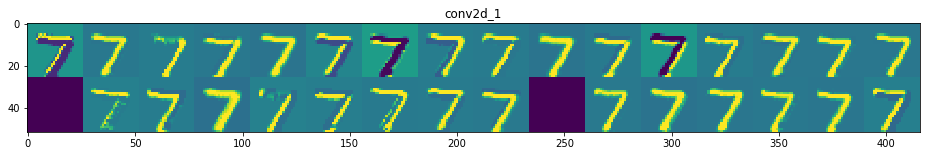

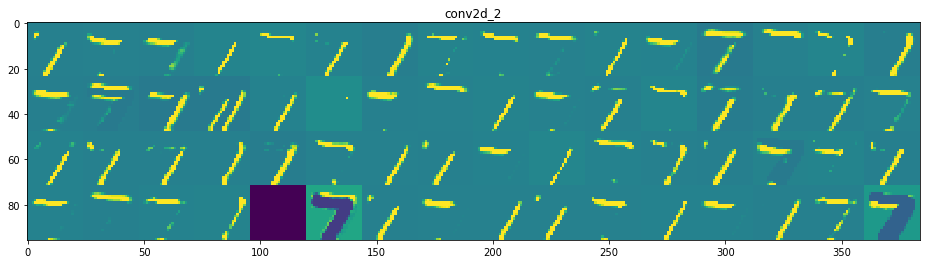

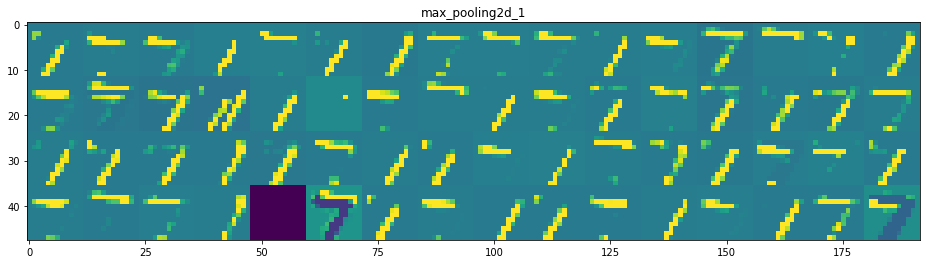

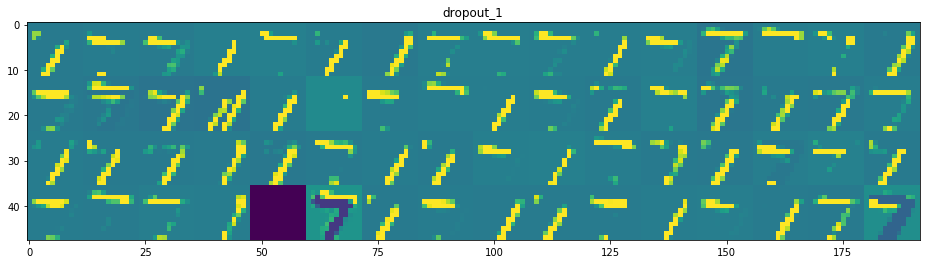

In [5]:
activis(model, x_test[0], layers = [0, 1, 2 ,3])

# Squares

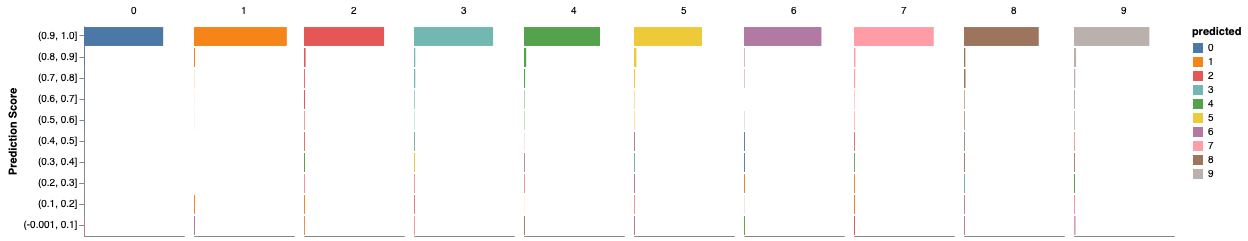

In [32]:
squares(y_prob, actual, y_classes)

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
clf = RandomForestClassifier().fit(x_train, y_train.argmax(axis=-1))

/Users/ignat/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [7]:
y_prob = clf.predict_proba(x_test)
y_classes = clf.predict(x_test)

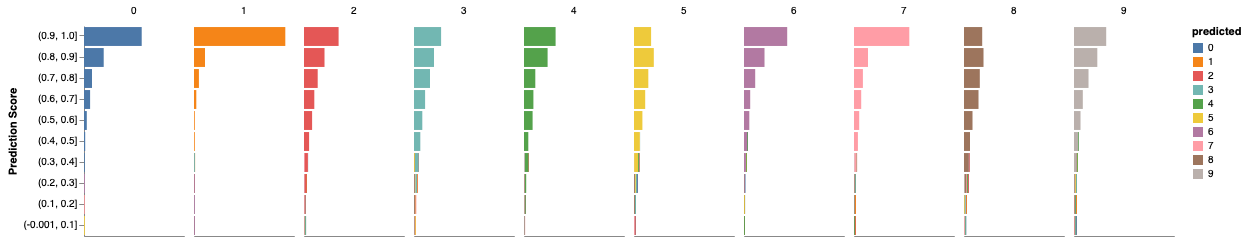

In [8]:
squares(y_prob, actual, y_classes)